In [37]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/f05_b1/inc90/BHOSS_CODE"
data = "f05_b1_incl_90_IMAGE_GRMHD_HAMR3D_SANEA05_192_917.dat"
#data = "Rh40_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_SANEA93M_132.dat"
#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT_old/BHOSS_CODE"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=2)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9174.015871 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 0.0 0.00222148
Total flux = 2.103312 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 1
time: 9146.117533 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.00946501
Total flux = 1.944447 Jy at 230 GHz
147:47:39.030 - Start Program


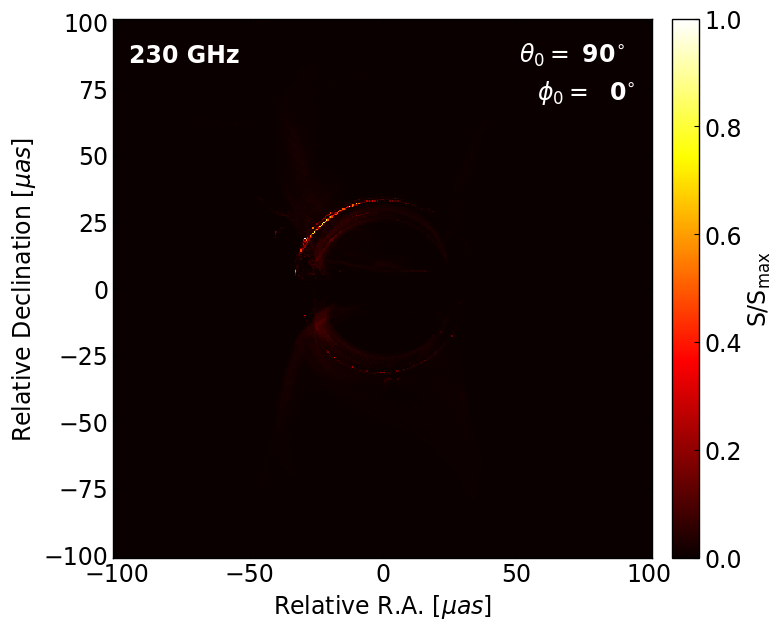

In [34]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [38]:
import os
import numpy as np

#find average flux
def bhoss_avg(Te_model,inclination,model_name, ifreq=2):

    note=""
    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    elif (model_name == "SANEA05"):
        model_str = "bhoss_SA05"
        ind_start=900
        ind_end = 999
        note="192_"
    elif (model_name == "SANEA0"):
        model_str = "bhoss_SA0"
        ind_start=640
        ind_end = 739
    else:
        print("no model")
        return
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Te_model,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="%s_incl_%d_IMAGE_GRMHD_HAMR3D_%s_%s%d.dat" \
        %(Te_model,inclination,model_name,note,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+Te_model,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [39]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1", 10, "SANEA05", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/f05_b1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
900, flux: 2.246811 at 9004.175748
901, flux: 2.194786 at 9014.467259
902, flux: 2.042150 at 9024.753706
903, flux: 2.031557 at 9035.042339
904, flux: 2.073139 at 9040.190678
905, flux: 2.197229 at 9050.479649
906, flux: 2.148854 at 9060.777796
907, flux: 2.091232 at 9071.068808
908, flux: 2.104664 at 9081.361434
909, flux: 2.176505 at 9091.653085
910, flux: 2.224325 at 9101.943931
911, flux: 2.330057 at 9112.236989
912, flux: 2.323591 at 9122.537982
913, flux: 2.221165 at 9132.835339
914, flux: 1.963262 at 9143.127573
915, flux: 1.814843 at 9153.426788
916, flux: 1.664981 at 9163.713532
917, flux: 1.653130 at 9174.015871
918, flux: 1.562222 at 9184.310153
919, flux: 1.625585 at 9194.611719
920, flux: 1.726959 at 9204.910398
921, flux: 1.745407 at 9210.053489
922, flux: 1.759448 at 9220.340913
923, flux: 1.759953 at 9230.627288
924, flux: 1.86

In [40]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [41]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 900/999/100
average z_tot = 2.019470 Jy, the density scale = 3.050000e-15


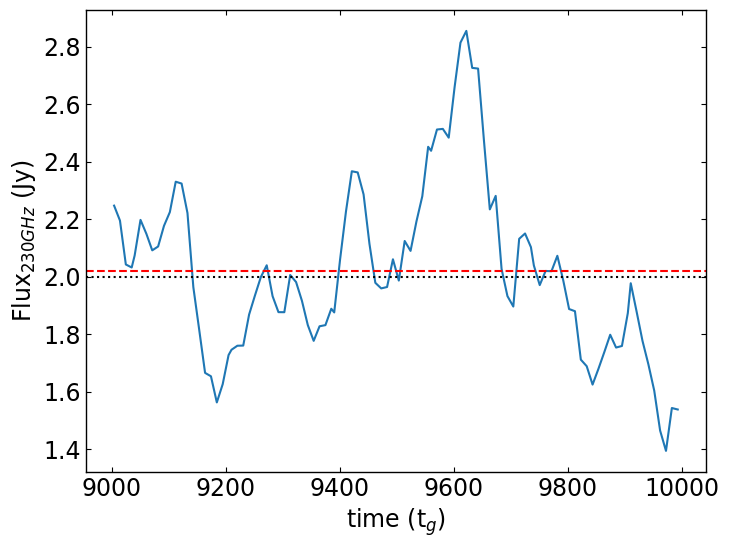

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [43]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

900:: 2.246811 Jy at 9004.175748
901:: 2.194786 Jy at 9014.467259
902:: 2.042150 Jy at 9024.753706
903:: 2.031557 Jy at 9035.042339
904:: 2.073139 Jy at 9040.190678
905:: 2.197229 Jy at 9050.479649
906:: 2.148854 Jy at 9060.777796
907:: 2.091232 Jy at 9071.068808
908:: 2.104664 Jy at 9081.361434
909:: 2.176505 Jy at 9091.653085
910:: 2.224325 Jy at 9101.943931
911:: 2.330057 Jy at 9112.236989
912:: 2.323591 Jy at 9122.537982
913:: 2.221165 Jy at 9132.835339
914:: 1.963262 Jy at 9143.127573
915:: 1.814843 Jy at 9153.426788
916:: 1.664981 Jy at 9163.713532
917:: 1.653130 Jy at 9174.015871
918:: 1.562222 Jy at 9184.310153
919:: 1.625585 Jy at 9194.611719
920:: 1.726959 Jy at 9204.910398
921:: 1.745407 Jy at 9210.053489
922:: 1.759448 Jy at 9220.340913
923:: 1.759953 Jy at 9230.627288
924:: 1.867862 Jy at 9240.912106
925:: 1.934432 Jy at 9251.207150
926:: 1.998272 Jy at 9261.504341
927:: 2.039287 Jy at 9271.801193
928:: 1.931778 Jy at 9282.101724
929:: 1.876287 Jy at 9292.393767
930:: 1.87

In [44]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1", 50, "SANEA05", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/f05_b1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
900, flux: 2.210766 at 9004.175748
901, flux: 2.114787 at 9014.467259
902, flux: 2.036834 at 9024.753706
903, flux: 2.040128 at 9035.042339
904, flux: 2.115888 at 9040.190678
905, flux: 2.254209 at 9050.479649
906, flux: 2.181810 at 9060.777796
907, flux: 2.081841 at 9071.068808
908, flux: 2.071290 at 9081.361434
909, flux: 2.144549 at 9091.653085
910, flux: 2.132735 at 9101.943931
911, flux: 2.299325 at 9112.236989
912, flux: 2.429065 at 9122.537982
913, flux: 2.340592 at 9132.835339
914, flux: 2.118548 at 9143.127573
915, flux: 2.068635 at 9153.426788
916, flux: 1.914742 at 9163.713532
917, flux: 1.926833 at 9174.015871
918, flux: 1.728980 at 9184.310153
919, flux: 1.667579 at 9194.611719
920, flux: 1.683843 at 9204.910398
921, flux: 1.716827 at 9210.053489
922, flux: 1.882839 at 9220.340913
923, flux: 1.953300 at 9230.627288
924, flux: 2.18

In [45]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [46]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 900/999/100
average z_tot = 2.053194 Jy, the density scale = 3.000000e-15


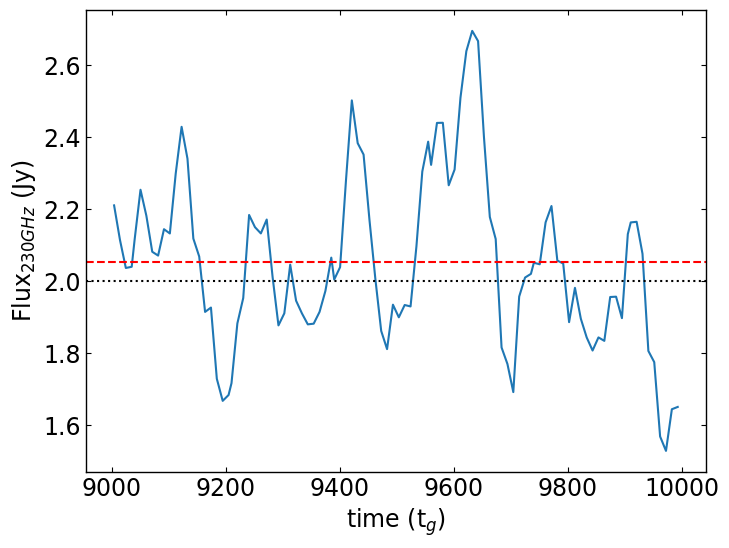

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [48]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

900:: 2.210766 Jy at 9004.175748
901:: 2.114787 Jy at 9014.467259
902:: 2.036834 Jy at 9024.753706
903:: 2.040128 Jy at 9035.042339
904:: 2.115888 Jy at 9040.190678
905:: 2.254209 Jy at 9050.479649
906:: 2.181810 Jy at 9060.777796
907:: 2.081841 Jy at 9071.068808
908:: 2.071290 Jy at 9081.361434
909:: 2.144549 Jy at 9091.653085
910:: 2.132735 Jy at 9101.943931
911:: 2.299325 Jy at 9112.236989
912:: 2.429065 Jy at 9122.537982
913:: 2.340592 Jy at 9132.835339
914:: 2.118548 Jy at 9143.127573
915:: 2.068635 Jy at 9153.426788
916:: 1.914742 Jy at 9163.713532
917:: 1.926833 Jy at 9174.015871
918:: 1.728980 Jy at 9184.310153
919:: 1.667579 Jy at 9194.611719
920:: 1.683843 Jy at 9204.910398
921:: 1.716827 Jy at 9210.053489
922:: 1.882839 Jy at 9220.340913
923:: 1.953300 Jy at 9230.627288
924:: 2.184143 Jy at 9240.912106
925:: 2.150223 Jy at 9251.207150
926:: 2.132857 Jy at 9261.504341
927:: 2.171445 Jy at 9271.801193
928:: 2.011878 Jy at 9282.101724
929:: 1.877296 Jy at 9292.393767
930:: 1.91

In [49]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1", 90, "SANEA05", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/f05_b1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
900, flux: 2.312373 at 9004.175748
901, flux: 2.095979 at 9014.467259
902, flux: 2.118281 at 9024.753706
903, flux: 1.980605 at 9035.042339
904, flux: 1.964408 at 9040.190678
905, flux: 2.276421 at 9050.479649
906, flux: 2.287652 at 9060.777796
907, flux: 2.219461 at 9071.068808
908, flux: 2.136825 at 9081.361434
909, flux: 2.218989 at 9091.653085
910, flux: 2.162345 at 9101.943931
911, flux: 2.361770 at 9112.236989
912, flux: 2.506412 at 9122.537982
913, flux: 2.448188 at 9132.835339
914, flux: 2.213139 at 9143.127573
915, flux: 2.235709 at 9153.426788
916, flux: 2.098234 at 9163.713532
917, flux: 2.071521 at 9174.015871
918, flux: 1.934620 at 9184.310153
919, flux: 1.850219 at 9194.611719
920, flux: 1.774596 at 9204.910398
921, flux: 1.887531 at 9210.053489
922, flux: 2.041370 at 9220.340913
923, flux: 2.160830 at 9230.627288
924, flux: 2.28

In [50]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [51]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 900/999/100
average z_tot = 2.042772 Jy, the density scale = 3.350000e-15


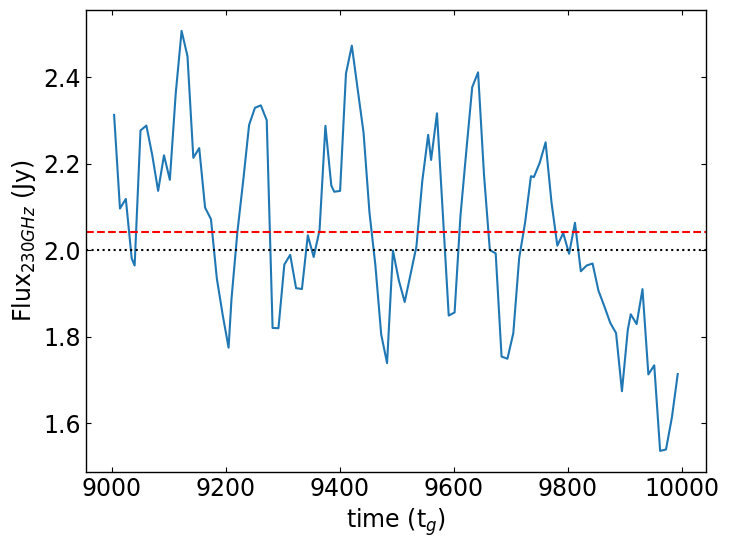

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [53]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

900:: 2.312373 Jy at 9004.175748
901:: 2.095979 Jy at 9014.467259
902:: 2.118281 Jy at 9024.753706
903:: 1.980605 Jy at 9035.042339
904:: 1.964408 Jy at 9040.190678
905:: 2.276421 Jy at 9050.479649
906:: 2.287652 Jy at 9060.777796
907:: 2.219461 Jy at 9071.068808
908:: 2.136825 Jy at 9081.361434
909:: 2.218989 Jy at 9091.653085
910:: 2.162345 Jy at 9101.943931
911:: 2.361770 Jy at 9112.236989
912:: 2.506412 Jy at 9122.537982
913:: 2.448188 Jy at 9132.835339
914:: 2.213139 Jy at 9143.127573
915:: 2.235709 Jy at 9153.426788
916:: 2.098234 Jy at 9163.713532
917:: 2.071521 Jy at 9174.015871
918:: 1.934620 Jy at 9184.310153
919:: 1.850219 Jy at 9194.611719
920:: 1.774596 Jy at 9204.910398
921:: 1.887531 Jy at 9210.053489
922:: 2.041370 Jy at 9220.340913
923:: 2.160830 Jy at 9230.627288
924:: 2.289126 Jy at 9240.912106
925:: 2.328800 Jy at 9251.207150
926:: 2.334358 Jy at 9261.504341
927:: 2.300151 Jy at 9271.801193
928:: 1.820121 Jy at 9282.101724
929:: 1.819558 Jy at 9292.393767
930:: 1.96